In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
## Using Python 3.10 
import sentinelhub
import matplotlib

import datetime as dt 
import matplotlib.pyplot as plt
import numpy as np
import os
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox
import cv2


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
from sentinelhub import SHConfig


config = SHConfig()



if not config.sh_client_id or not config.sh_client_secret:
    print("Warning! To use Process API, please provide the credentials (OAuth client ID and client secret).")

In [5]:
import datetime
import os

import matplotlib.pyplot as plt
import numpy as np

from sentinelhub import (
    CRS,
    BBox,
    DataCollection,
    DownloadRequest,
    MimeType,
    MosaickingOrder,
    SentinelHubDownloadClient,
    SentinelHubRequest,
    bbox_to_dimensions,
)

# The following is not a package. It is a file utils.py which should be in the same folder as this notebook.
from utils import plot_image

In [5]:
# print("Supported DataCollections:\n")
# for collection in DataCollection.get_available_collections():
#     print(collection)

In [3]:
from sentinelhub import BBox, CRS

# Define the bounding box coordinates for NSW
nsw_bbox = BBox((140.0, -38.0, 154.0, -28.0), CRS.WGS84)

# Define the size of each square bounding box (2000 km²)
box_size = 2000  # in kilometers

# Calculate the number of rows and columns based on the box size
num_rows = int((nsw_bbox.max_y - nsw_bbox.min_y) / box_size)
num_cols = int((nsw_bbox.max_x - nsw_bbox.min_x) / box_size)

# Calculate the width and height of each square bounding box
box_width = (nsw_bbox.max_x - nsw_bbox.min_x) / num_cols
box_height = (nsw_bbox.max_y - nsw_bbox.min_y) / num_rows

# Generate the non-overlapping bounding boxes
bounding_boxes = []
for i in range(num_rows):
    for j in range(num_cols):
        min_x = nsw_bbox.min_x + j * box_width
        max_x = nsw_bbox.min_x + (j + 1) * box_width
        min_y = nsw_bbox.min_y + i * box_height
        max_y = nsw_bbox.min_y + (i + 1) * box_height
        bounding_boxes.append(BBox((min_x, min_y, max_x, max_y), CRS.WGS84))

# Print the generated bounding boxes
for bbox in bounding_boxes:
    print(bbox)

ZeroDivisionError: float division by zero

In [ ]:
BBox((150.236764,-32.96625,150.749324,-32.585723),CRS.WGS84)

In [6]:


areas = [

    {'name': 'FS1_Gospers1',
    'bbox': BBox((150.236764,-32.96625,150.749324,-32.585723), CRS.WGS84),
    'start_date':  datetime.date(2019, 12, 1),
    'end_date' : datetime.date(2019, 12, 1)
    }
    , 

    {'name': 'FS2_Gospers2',
    'bbox': BBox((150.237152,-33.37656,150.74939,-32.994991), CRS.WGS84),
    'start_date':  datetime.date(2019, 12, 1),
    'end_date' :  datetime.date(2019, 12, 1)
    }
    , 

    {'name': 'FS3_Currowan',
    'bbox': BBox((149.734396,-35.847903,150.248858,-35.450546), CRS.WGS84),
    'start_date':  datetime.date(2019, 12, 1),
    'end_date' :  datetime.date(2019, 12, 1)
    }
    ,

    {'name': 'FS4_OrroralValley',
    'bbox': BBox((148.709771,-35.978309,149.214943,-35.57238), CRS.WGS84),
    'start_date':  datetime.date(2019, 12, 1),
    'end_date' :  datetime.date(2019, 12, 1)
    }
    ,

    {'name': 'FS5_EGippsland',
    'bbox': BBox((147.800771,-37.523136,148.328104,-37.126857), CRS.WGS84),
    'start_date':  datetime.date(2019, 12, 1),
    'end_date' :  datetime.date(2019, 12, 1)
    }
    ,

    {'name': 'FS6_KangarooIsland',
    'bbox': BBox((136.517576,-36.098717,137.011885,-35.692955), CRS.WGS84),
    'start_date':  datetime.date(2019, 12, 1),
    'end_date' :  datetime.date(2019, 12, 1)
    }

    ,

    {'name': 'NFS1',
    'bbox': BBox((138.542911,-34.659186,139.038304,-34.254677), CRS.WGS84),
    'start_date':  datetime.date(2019, 12, 1),
    'end_date' :  datetime.date(2019, 12, 1)
    } ,

   {'name': 'NFS2',
    'bbox': BBox((147.340393,-31.575179,147.795908,-31.158759), CRS.WGS84),
    'start_date':  datetime.date(2019, 12, 1),
    'end_date' :  datetime.date(2019, 12, 1)
    } ,
    
    {'name': 'NFS3',
    'bbox': BBox((139.545784,-24.985456,139.991957,-24.580903), CRS.WGS84),
    'start_date':  datetime.date(2019, 12, 1),
    'end_date' :  datetime.date(2019, 12, 1)
    } ,

    {'name': 'NFS4',
    'bbox': BBox((152.744541,-30.430054,153.219835,-30.034722), CRS.WGS84),
    'start_date':  datetime.date(2019, 12, 1),
    'end_date' :  datetime.date(2019, 12, 1)
    } ,

    {'name': 'NFS5',
    'bbox': BBox((144.740949, -33.830676, 145.263856, -33.43082), CRS.WGS84),
    'start_date':  datetime.date(2019, 12, 1),
    'end_date' :  datetime.date(2019, 12, 1)
    } ,

    {'name': 'NFS6',
    'bbox': BBox((143.775879,-37.22504,144.317579,-36.837637), CRS.WGS84),
    'start_date':  datetime.date(2019, 12, 1),
    'end_date' :  datetime.date(2019, 12, 1)
    } ,

    {'name': 'NFS7',
    'bbox': BBox((148.25569, -22.293315, 148.720665, -21.892345), CRS.WGS84),
    'start_date':  datetime.date(2019, 12, 1),
    'end_date' :  datetime.date(2019, 12, 1)
    } ,


]

Using catalog API with process API to get time series data for a bbox

In [38]:
## allows for downloading of time series data between two time intervals 

from sentinelhub import SentinelHubCatalog

catalog = SentinelHubCatalog(config=config)

In [ ]:
## Downloading the unlabelled images

from sentinelhub import MimeType, SentinelHubDownloadClient, SentinelHubRequest, bbox_to_dimensions, filter_times

if False: ## Set to true if you want to redownload the data 

    for area in areas:

        bbox = area['bbox']
        time_interval = "2019-11-01", "2020-03-01"
        name = area['name']
        print(name)


        search_iterator = catalog.search(
            DataCollection.SENTINEL2_L2A,
            bbox=bbox,
            time=time_interval,
            filter="eo:cloud_cover < 20", ## Filter for cloud cover less than certain percentage (data has <20, and data_nc has <2)
            fields={"include": ["id", "properties.datetime", "properties.eo:cloud_cover"], "exclude": []},
        )

        results = list(search_iterator)
        print("Total number of results:", len(results))


        

        time_difference = dt.timedelta(hours=1)

        all_timestamps = search_iterator.get_timestamps()
        unique_acquisitions = filter_times(all_timestamps, time_difference)

        print("Number of unique timestamps: ", len(unique_acquisitions))
        unique_acquisitions


        evalscript_true_color = """
                //VERSION=3

                function setup() {
                    return {
                        input: [{
                            bands: ["B02", "B03", "B04"]
                        }],
                        output: {
                            bands: 3
                        }
                    };
                }

                function evaluatePixel(sample) {
                    return [sample.B04, sample.B03, sample.B02];
                }
            """


        process_requests = []

        for timestamp in unique_acquisitions:
            request = SentinelHubRequest(
                evalscript=evalscript_true_color,
                input_data=[
                    SentinelHubRequest.input_data(
                        data_collection=DataCollection.SENTINEL2_L2A,
                        time_interval=(timestamp - time_difference, timestamp + time_difference),
                    )
                ],
                responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
                bbox=bbox,
                size=bbox_to_dimensions(bbox, resolution = 20),
                config=config,
            )
            process_requests.append(request)


        client = SentinelHubDownloadClient(config=config)

        download_requests = [request.download_list[0] for request in process_requests]

        data = client.download(download_requests)

        data[0].shape

        for idx, (image, timestamp) in enumerate(zip(data, unique_acquisitions)):
            # cv2.imwrite("data/" + name +  str(timestamp.date()) + ".png", image) ## <20 cloudcover
            cv2.imwrite("data_nc/" + name +  str(timestamp.date()) + ".png", image) ## for no cloud cover folder <2

            # print(str(timestamp.date()) + "GospersF1")

        print(name, " is done")

Evaluating different ways to get active fire labels 
- Appears the one from https://custom-scripts.sentinel-hub.com/sentinel-2/active_fire_detection/ seems to be the best

Image type: uint8


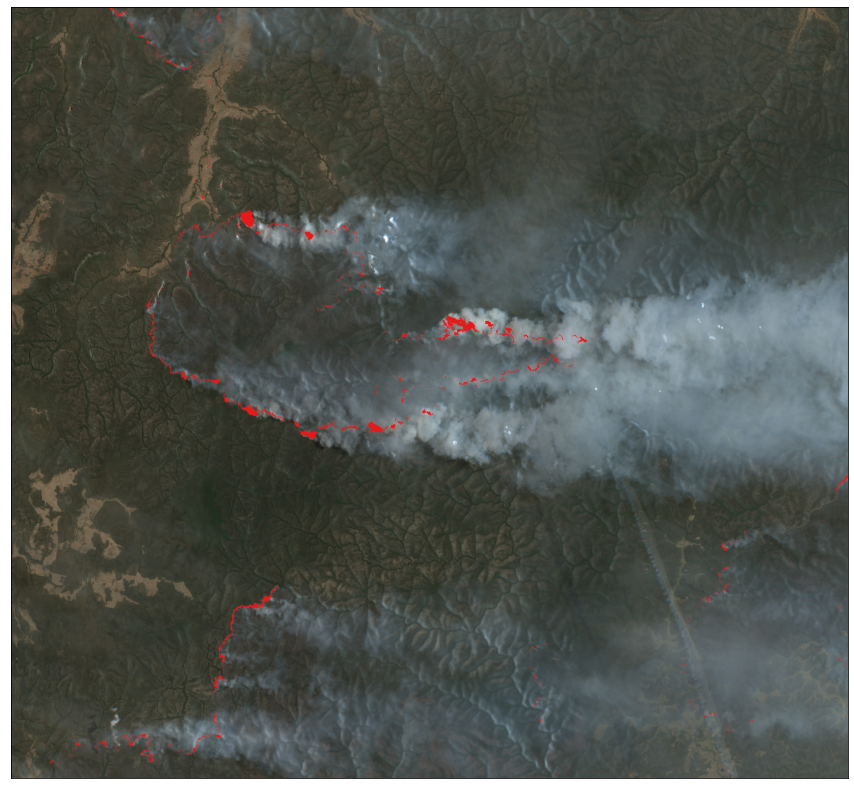

In [41]:
## Piere NMarkruse V3

evalscript_label_color  = """
// VERSION=3
// QuickFire V1.0.0 by Pierre Markuse (https://twitter.com/Pierre_Markuse)
// Made for use in the Sentinel Hub EO Browser (https://apps.sentinel-hub.com/eo-browser/?)
// CC BY 4.0 International (https://creativecommons.org/licenses/by/4.0/)

function setup() {
  return {
    input: ["B01","B02","B03","B04","B08","B8A","B11","B12","CLP", "dataMask"],
    output: { bands: 4 }
  };
}

function stretch(val, min, max) {return (val - min) / (max - min);} 

function satEnh(arr, s) {
   var avg = arr.reduce((a, b) => a + b, 0) / arr.length;
   return arr.map(a => avg * (1 - s) + a * s);
}

 function layerBlend(lay1, lay2, lay3, op1, op2, op3) {
    return lay1.map(function(num, index) {
     return (num / 100 * op1 + (lay2[index] / 100 * op2) + (lay3[index] / 100 * op3));
    });
  }  

function evaluatePixel(sample) {
  const hsThreshold = [2.0, 1.5, 1.25, 1.0];
  const hotspot = 1;
  const style = 1;
  const hsSensitivity = 1.0;
  const boost = 1;
  const RED = [0.9, 0.1, 0.1] ; 
  
  const cloudAvoidance = 1;
  const cloudAvoidanceThreshold = 245;
  const avoidanceHelper = 0.8;

  const offset = -0.000;
  const saturation = 1.10;
  const brightness = 1.00;
  const sMin = 0.01;
  const sMax = 0.99;
  

  const NDWI = (sample.B03-sample.B08)/(sample.B03+sample.B08);
  const NDVI = (sample.B08-sample.B04)/(sample.B08+sample.B04);
  const waterHighlight = 0;
  const waterBoost = 2.0;
  const NDVI_threshold = -0.15;
  const NDWI_threshold = 0.15;
  const waterHelper = 0.2;
  
  const Black = [0, 0, 0];
  const NBRindex = (sample.B08-sample.B12) / (sample.B08+sample.B12); 
  const naturalColorsCC = [Math.sqrt(brightness * sample.B04 + offset), Math.sqrt(brightness * sample.B03 + offset), Math.sqrt(brightness * sample.B02 + offset)];
  const naturalColors = [(2.5 * brightness * sample.B04 + offset), (2.5 * brightness * sample.B03 + offset), (2.5 * brightness * sample.B02 + offset)];
  const URBAN = [Math.sqrt(brightness * sample.B12 * 1.2 + offset), Math.sqrt(brightness * sample.B11 * 1.4 + offset), Math.sqrt(brightness * sample.B04 + offset)];
  const SWIR = [Math.sqrt(brightness * sample.B12 + offset), Math.sqrt(brightness * sample.B8A + offset), Math.sqrt(brightness * sample.B04 + offset)];
  const NIRblue = colorBlend(sample.B08, [0, 0.25, 1], [[0/255, 0/255, 0/255],[0/255, 100/255, 175/255],[150/255, 230/255, 255/255]]);
  const classicFalse = [sample.B08 * brightness, sample.B04 * brightness, sample.B03 * brightness];
  const NIR = [sample.B08 * brightness, sample.B08 * brightness, sample.B08 * brightness];
  const atmoPen = [sample.B12 * brightness, sample.B11 * brightness, sample.B08 * brightness];
  var enhNaturalColors = [0, 0, 0];
  for (let i = 0; i < 3; i += 1) { enhNaturalColors[i] = (brightness * ((naturalColors[i] + naturalColorsCC[i]) / 2) + (URBAN[i] / 10)); }
  
  const manualCorrection = [0.00, 0.00, 0.00];
  
  var Viz = layerBlend(URBAN, naturalColors, naturalColorsCC, 10, 40, 50); // Choose visualization(s) and opacity here


  if (hotspot) {  
    if ((!cloudAvoidance) || ((sample.CLP<cloudAvoidanceThreshold) && (sample.B02<avoidanceHelper))) {
     switch (style) {
       case 1:
        if ((sample.B12 + sample.B11) > (hsThreshold[0] / hsSensitivity)) return [0.9, 0.1, 0.1, sample.dataMask]; 
        if ((sample.B12 + sample.B11) > (hsThreshold[1] / hsSensitivity)) return [0.9, 0.1, 0.1, sample.dataMask]; 
        if ((sample.B12 + sample.B11) > (hsThreshold[2] / hsSensitivity)) return [0.9, 0.1, 0.1, sample.dataMask];  
        if ((sample.B12 + sample.B11) > (hsThreshold[3] / hsSensitivity)) return [0.9, 0.1, 0.1, sample.dataMask]; 
       break;
       case 2:
        if ((sample.B12 + sample.B11) > (hsThreshold[3] / hsSensitivity)) return [1, 0, 0, sample.dataMask]; 
       break;
       case 3:
        if ((sample.B12 + sample.B11) > (hsThreshold[3] / hsSensitivity)) return [1, 1, 0, sample.dataMask]; 
       break;
       case 4:  
        if ((sample.B12 + sample.B11) > (hsThreshold[3] / hsSensitivity)) return [Viz[0] + 0.2, Viz[1] - 0.2, Viz[2] - 0.2, sample.dataMask];
       break;
       default:
      }
    }
  }



  return [Viz[0], Viz[1], Viz[2], sample.dataMask];
}

 """

bb = BBox((150.236764,-32.96625,150.749324,-32.585723), CRS.WGS84)
request_true_color = SentinelHubRequest(
    evalscript=evalscript_label_color,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A,
            # data_collection=DataCollection.MODIS,
            time_interval=("2019-12-06", "2019-12-06"),
        ) 
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=bb,
    size = bbox_to_dimensions(bb, resolution=20),
    # resolution= 100, 
    config=config,
)

true_color_imgs = request_true_color.get_data()

image = true_color_imgs[0]
print(f"Image type: {image.dtype}")

# plot function
# factor 1/255 to scale between 0-1
# factor 3.5 to increase brightness

plot_image(image,1/255,clip_range=(0, 1)) 

Image type: uint8


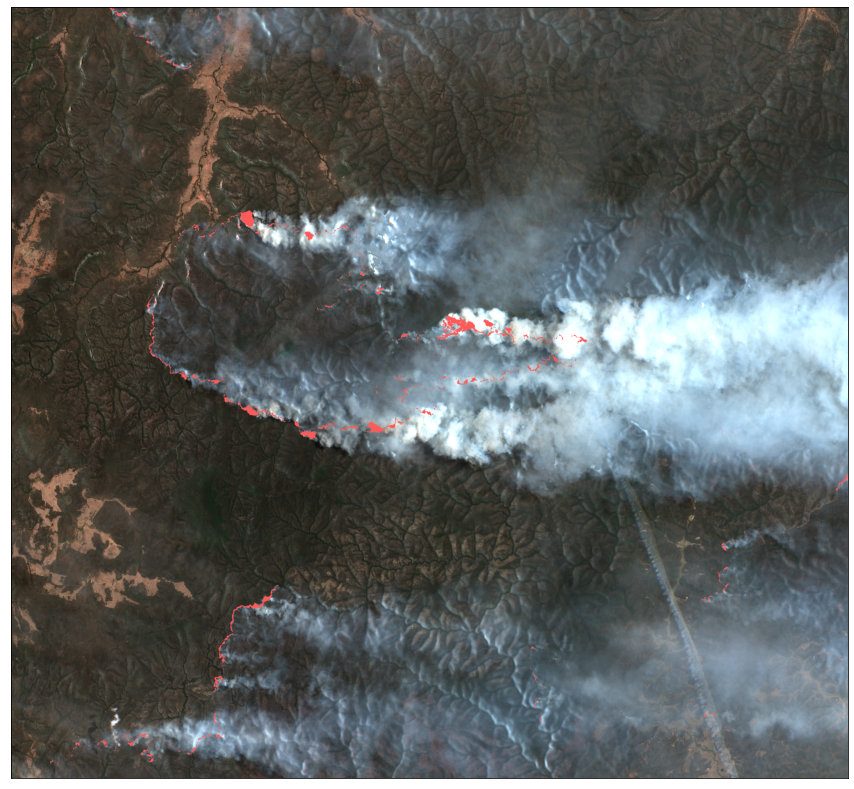

In [42]:
## Pierre Markruse V1 
evalscript_label_color = """
        //VERSION=3

    function setup() {
    return {
        input: ["B02","B03","B04", "B11","B12"],
        output: { bands: 3 }
    };
    }
 
   

    function evaluatePixel(sample){
    
        if ((sample.B12 + sample.B11) > (1.0)){
        return[0.9, 0.1, 0.1]
        } return [sample.B04, sample.B03, sample.B02]
    
    }
    """


bb = BBox((150.236764,-32.96625,150.749324,-32.585723), CRS.WGS84)
request_true_color = SentinelHubRequest(
    evalscript=evalscript_label_color,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A,
            # data_collection=DataCollection.MODIS,
            time_interval=("2019-12-06", "2019-12-06"),
        ) 
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=bb,
    size = bbox_to_dimensions(bb, resolution=20),
    # resolution= 100, 
    config=config,
)

true_color_imgs = request_true_color.get_data()

image = true_color_imgs[0]
print(f"Image type: {image.dtype}")

# plot function
# factor 1/255 to scale between 0-1
# factor 3.5 to increase brightness

plot_image(image, factor=3.5 / 255, clip_range=(0, 1)) 

Image type: uint8


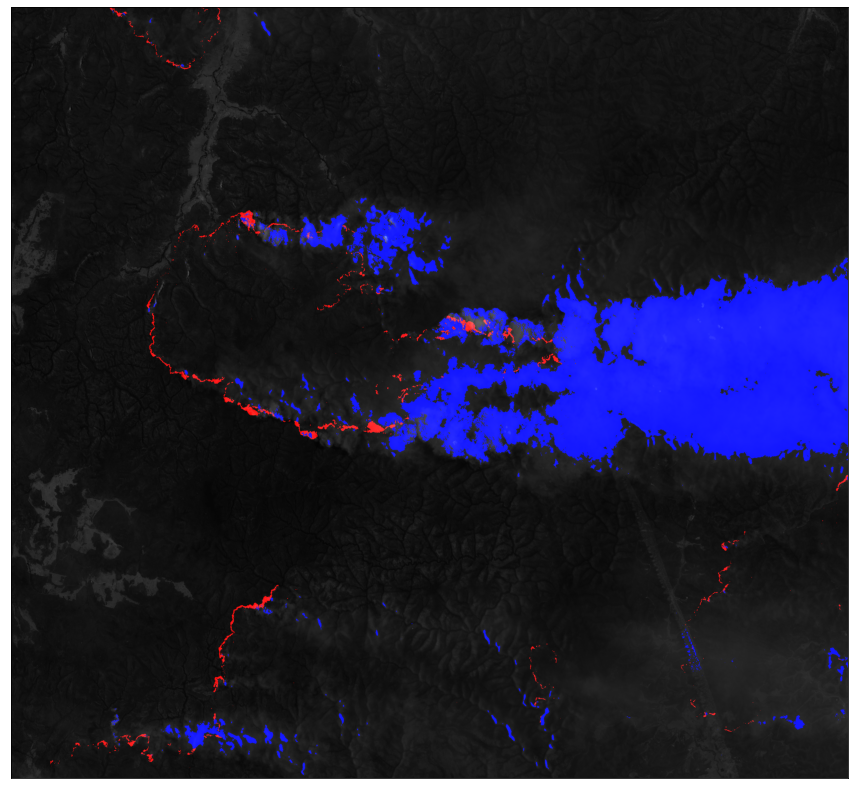

In [43]:


## https://custom-scripts.sentinel-hub.com/sentinel-2/active_fire_detection/
evalscript_label_color = """

   function setup() {
    return {
        input: ["B02","B03","B04", "B11","B12"],
        output: { bands: 3 }
    };
    }

    function evaluatePixel(sample){
        var NGDR = index(sample.B02, sample.B03);
        var Inverse = (sample.B02 - 0.2) / (0.5 - 0.2);
        //Fire indicator
        var SAHM_INDEX= ((sample.B12 - sample.B11) / (sample.B12 + sample.B11));

        if (Inverse > 1) { 
            return [0.5 * sample.B04, 0.5 * sample.B03, 20 * sample.B02 ];
        }

        if (Inverse > 0 && NGDR>0) { 
            return [0.5 * sample.B04  , 0.5 * sample.B03, 20 * sample.B02];
        }

        if((SAHM_INDEX>0.4)||(sample.B12>1)){
        return[20*sample.B04, 1*sample.B03, 1*sample.B02];
        }

        else {
        return [sample.B04,sample.B04,sample.B04]
        }
    }

    """


bb = BBox((150.236764,-32.96625,150.749324,-32.585723), CRS.WGS84)
request_true_color = SentinelHubRequest(
    evalscript=evalscript_label_color,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A,
            # data_collection=DataCollection.MODIS,
            time_interval=("2019-12-06", "2019-12-06"),
        ) 
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=bb,
    size = bbox_to_dimensions(bb, resolution=20),
    # resolution= 100, 
    config=config,
)

true_color_imgs = request_true_color.get_data()

image = true_color_imgs[0]
print(f"Image type: {image.dtype}")

# plot function
# factor 1/255 to scale between 0-1
# factor 3.5 to increase brightness

plot_image(image, factor=1 / 255, clip_range=(0, 1)) 

In [ ]:
if False: 

    from sentinelhub import MimeType, SentinelHubDownloadClient, SentinelHubRequest, bbox_to_dimensions, filter_times

        evalscript_label_color = """

        function setup() {
            return {
                input: ["B02","B03","B04", "B11","B12"],
                output: { bands: 3 }
            };
            }

            function evaluatePixel(sample){
                var NGDR = index(sample.B02, sample.B03);
                var Inverse = (sample.B02 - 0.2) / (0.5 - 0.2);
                //Fire indicator
                var SAHM_INDEX= ((sample.B12 - sample.B11) / (sample.B12 + sample.B11));

                if (Inverse > 1) { 
                    return [0.5 * sample.B04, 0.5 * sample.B03, 20 * sample.B02 ];
                }

                if (Inverse > 0 && NGDR>0) { 
                    return [0.5 * sample.B04  , 0.5 * sample.B03, 20 * sample.B02];
                }

                if((SAHM_INDEX>0.4)||(sample.B12>1)){
                return[20*sample.B04, 1*sample.B03, 1*sample.B02];
                }

                else {
                return [sample.B04,sample.B04,sample.B04]
                }
            }

            """

        for area in areas:

            bbox = area['bbox']
            time_interval = "2019-11-01", "2020-03-01"
            name = area['name']
            print(name)


            search_iterator = catalog.search(
                DataCollection.SENTINEL2_L2A,
                bbox=bbox,
                time=time_interval,
                filter="eo:cloud_cover < 2", ## Filter for cloud cover less than certain percentage
                fields={"include": ["id", "properties.datetime", "properties.eo:cloud_cover"], "exclude": []},
            )

            results = list(search_iterator)
            print("Total number of results:", len(results))


            time_difference = dt.timedelta(hours=1)

            all_timestamps = search_iterator.get_timestamps()
            unique_acquisitions = filter_times(all_timestamps, time_difference)

            print("Number of unique timestamps: ", len(unique_acquisitions))
            unique_acquisitions



            process_requests = []

            for timestamp in unique_acquisitions:
                request = SentinelHubRequest(
                    evalscript=evalscript_label_color,
                    input_data=[
                        SentinelHubRequest.input_data(
                            data_collection=DataCollection.SENTINEL2_L2A,
                            time_interval=(timestamp - time_difference, timestamp + time_difference),
                        )
                    ],
                    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
                    bbox=bbox,
                    size=bbox_to_dimensions(bbox, resolution = 20),
                    config=config,
                )
                process_requests.append(request)


            client = SentinelHubDownloadClient(config=config)

            download_requests = [request.download_list[0] for request in process_requests]

            data = client.download(download_requests)

            data[0].shape

            for idx, (image, timestamp) in enumerate(zip(data, unique_acquisitions)):
                # cv2.imwrite("data_label/L_" + name +  str(timestamp.date()) + ".png", image) ## <20 pct cloud cover
                # cv2.imwrite("data_nc_label/L_" + name +  str(timestamp.date()) + ".png", image) ## 2 pct cloud cover
                # cv2.imwrite("data_label2/L_" + name +  str(timestamp.date()) + ".png", image) ## <20 pct cloud cover, using better active fire detec
                cv2.imwrite("data_nc_label2/L_" + name +  str(timestamp.date()) + ".png", image) ## <2 pct cloud cover, using better active fire detec

                # print(str(timestamp.date()) + "GospersF1")

            print(name, " is done")

Creating the true label masks for the images
---


In [62]:
os.getcwd()

'/Users/oliverbestel/Desktop/COMP90055'

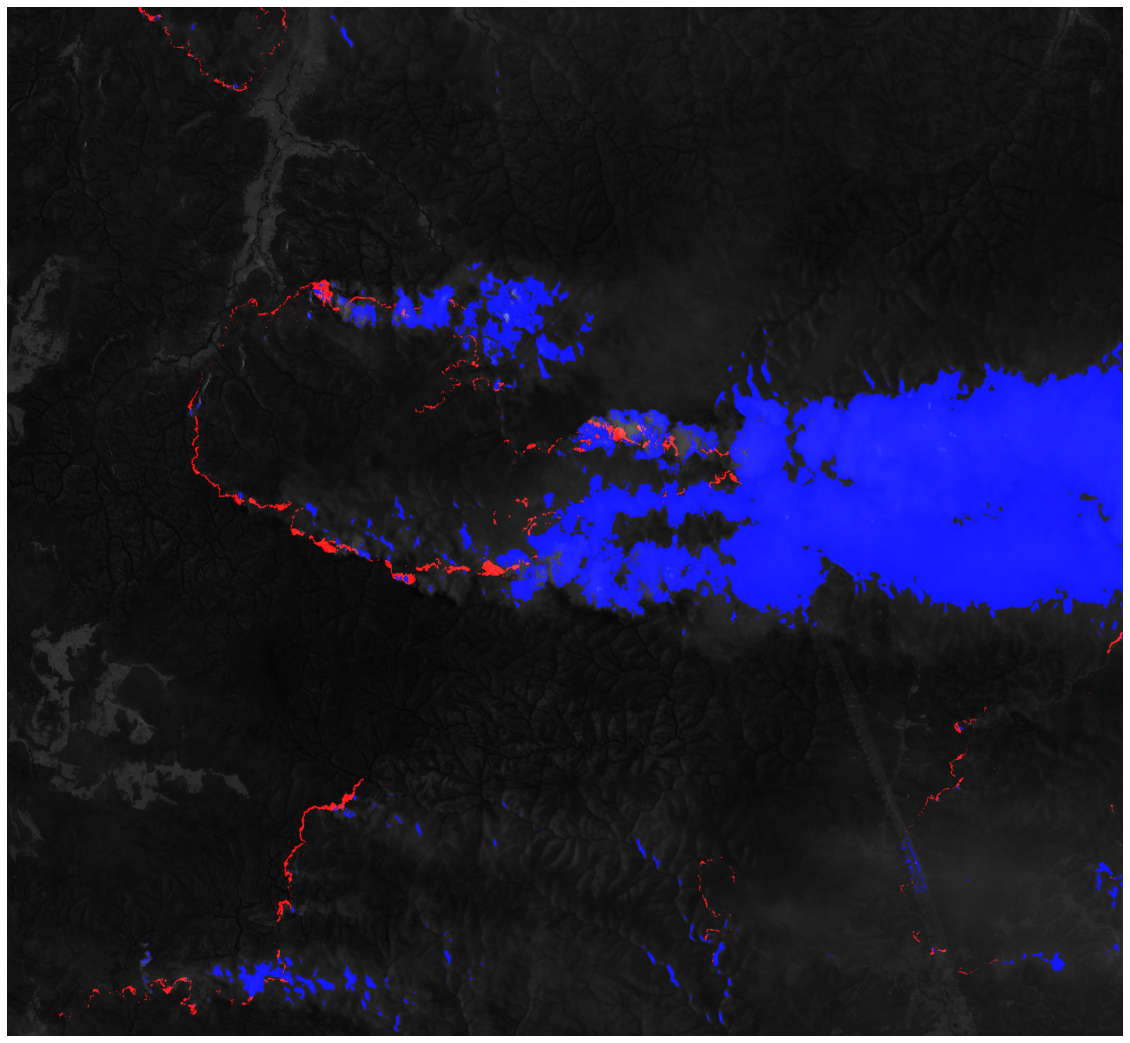

In [102]:
img = cv2.imread("data_label2/L_FS1_Gospers12019-12-06.png")
# img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)



plt.figure(figsize = (20,20))
plt.imshow(img)
plt.axis("off")
plt.show()


(2167, 2351, 3)


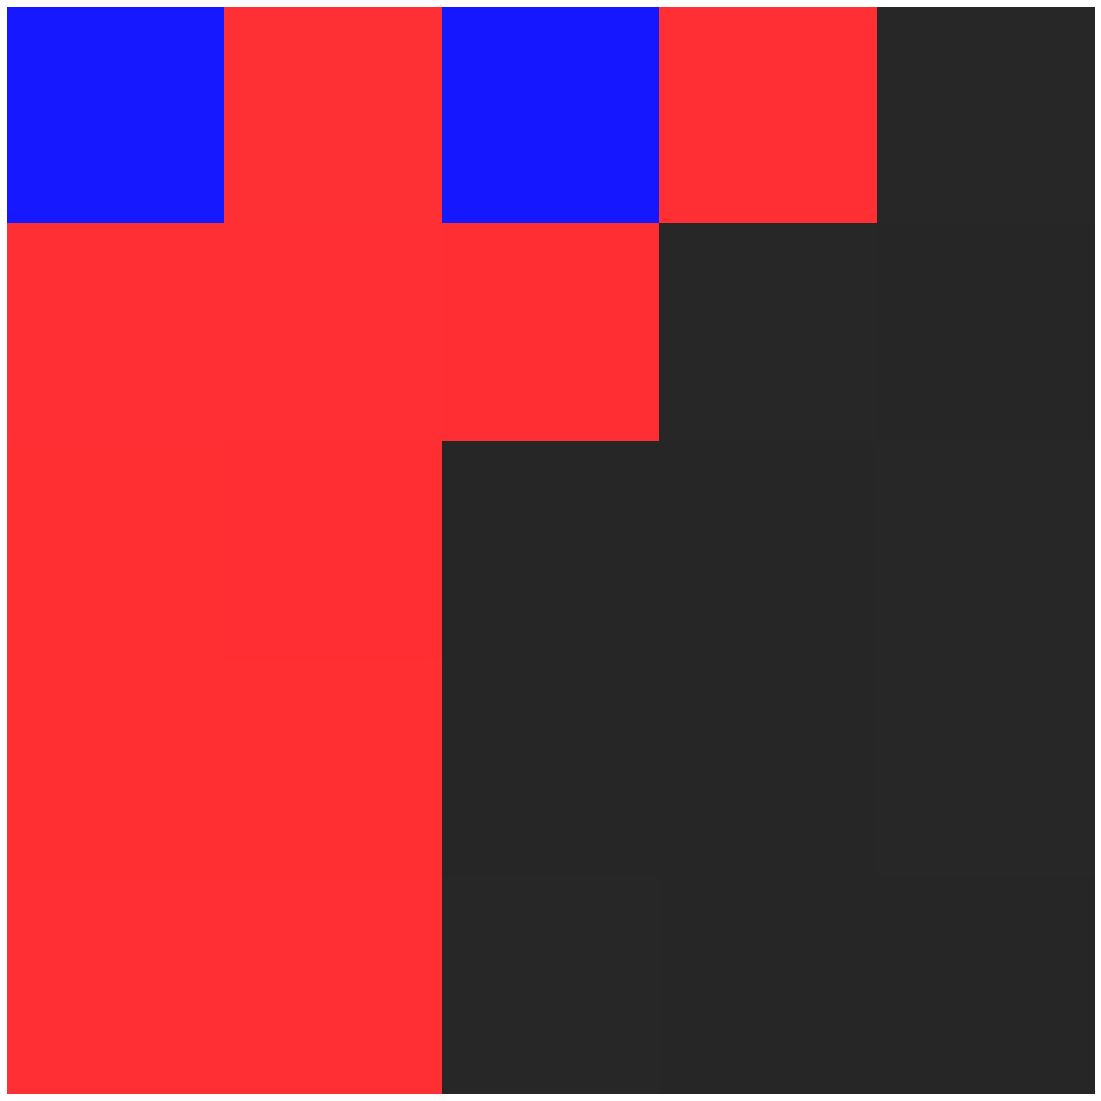

In [89]:
print(img.shape)
# subsection = img[]
subsection =img[1100:1105, 1100:1105, :]

plt.figure(figsize = (20,20))
plt.imshow(subsection)
plt.axis("off")
plt.show()


In [90]:
subsection

## This shows us that fire sections are characterised by a RED channel with value 255, 
# ## and cloud sections are characterised by a BLUE channel of 255

array([[[ 22,  24, 255],
        [255,  48,  51],
        [ 21,  24, 255],
        [255,  47,  51],
        [ 39,  39,  39]],

       [[255,  47,  51],
        [255,  47,  51],
        [255,  46,  50],
        [ 39,  39,  39],
        [ 38,  38,  38]],

       [[255,  47,  50],
        [255,  46,  50],
        [ 38,  38,  38],
        [ 38,  38,  38],
        [ 39,  39,  39]],

       [[255,  47,  50],
        [255,  47,  50],
        [ 38,  38,  38],
        [ 38,  38,  38],
        [ 39,  39,  39]],

       [[255,  47,  51],
        [255,  47,  51],
        [ 39,  39,  39],
        [ 38,  38,  38],
        [ 38,  38,  38]]], dtype=uint8)

This shows us that fire sections are characterised by a RED channel with value 255, 
and cloud sections are characterised by a BLUE channel of 255

Thus we do some vector operations to create a mask. 
We will create a mask that splits the pixels into fire, no fire.
We will create a second mask that splits the pixels into fire, cloud, background.

In [124]:
## Firstly fire, no fire. 

img = cv2.imread("data_label2/L_FS1_Gospers12019-12-06.png")
# img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img[img[:,:,0]!=255] = 0
img[img[:,:,0]==255] = 1 ## Set this to 255 if want to see clearly in image ## Indicates that is fire (Class = 1 -> Fire)

plt.figure(figsize = (20,20))
plt.imshow(img)
plt.axis("off")
plt.show()

In [144]:
label2_dir = os.listdir('data_label2')

for img_name in label2_dir:
    print(img_name)
    img = cv2.imread('data_label2/' + img_name)
    img[img[:,:,0]!=255] = 0
    img[img[:,:,0]==255] = 1
    cv2.imwrite("data_label2_masks_fnf/M" + img_name , img) 

        


L_NFS32020-01-05.png
L_NFS22020-01-23.png
L_NFS72020-03-01.png
L_NFS12019-12-13.png
L_NFS62019-12-17.png
L_NFS42020-01-01.png
L_NFS52019-12-12.png
L_FS3_Currowan2019-12-26.png
L_NFS52019-12-07.png
L_NFS42019-12-21.png
L_NFS52020-01-26.png
L_NFS72020-01-11.png
L_NFS12019-12-06.png
L_NFS12020-01-27.png
L_FS5_EGippsland2019-11-21.png
L_NFS22019-12-17.png
L_NFS32020-01-10.png
L_NFS22020-01-08.png
L_NFS12020-01-25.png
L_FS4_OrroralValley2019-12-04.png
L_FS4_OrroralValley2020-01-25.png
L_NFS62020-01-21.png
L_FS3_Currowan2020-01-10.png
L_FS1_Gospers12020-02-04.png
L_FS6_KangarooIsland2020-02-09.png
L_NFS52020-01-31.png
L_NFS72019-12-27.png
L_FS4_OrroralValley2020-01-30.png
L_FS4_OrroralValley2019-12-11.png
L_NFS12019-12-11.png
L_NFS12020-01-30.png
L_FS2_Gospers22020-02-04.png
L_NFS32019-12-26.png
L_FS5_EGippsland2020-02-17.png
L_NFS22019-12-14.png
L_NFS22019-12-04.png
L_NFS22020-01-31.png
L_FS5_EGippsland2020-02-07.png
L_FS2_Gospers22020-02-14.png
L_FS2_Gospers22019-11-21.png
L_FS4_OrroralVal

In [145]:
## Fire no fire for dataset with less cloud cover

label2_dir = os.listdir('data_nc_label2')

for img_name in label2_dir:
    print(img_name)
    img = cv2.imread('data_label2/' + img_name)
    img[img[:,:,0]!=255] = 0
    img[img[:,:,0]==255] = 1
    cv2.imwrite("data_nc_label2_masks_fnf/M" + img_name , img) 

        

L_NFS32020-01-05.png
L_NFS22020-01-23.png
L_NFS72020-03-01.png
L_NFS12019-12-13.png
L_NFS62019-12-17.png
L_NFS42020-01-01.png
L_FS3_Currowan2019-12-26.png
L_NFS52019-12-07.png
L_NFS42019-12-21.png
L_NFS52020-01-26.png
L_NFS72020-01-11.png
L_NFS12019-12-06.png
L_NFS12020-01-27.png
L_NFS22019-12-17.png
L_NFS32020-01-10.png
L_NFS22020-01-08.png
L_NFS12020-01-25.png
L_FS4_OrroralValley2019-12-04.png
L_FS4_OrroralValley2020-01-25.png
L_NFS62020-01-21.png
L_FS1_Gospers12020-02-04.png
L_FS6_KangarooIsland2020-02-09.png
L_NFS52020-01-31.png
L_FS4_OrroralValley2020-01-30.png
L_FS4_OrroralValley2019-12-11.png
L_NFS12019-12-11.png
L_NFS12020-01-30.png
L_FS2_Gospers22020-02-04.png
L_NFS32019-12-26.png
L_NFS22019-12-14.png
L_NFS22019-12-04.png
L_NFS22020-01-31.png
L_FS4_OrroralValley2020-01-08.png
L_NFS52020-01-21.png
L_FS1_Gospers12019-11-21.png
L_FS6_KangarooIsland2020-02-24.png
L_NFS42019-12-27.png
L_NFS72019-12-22.png
L_NFS12019-12-28.png
L_NFS22020-01-18.png
L_FS5_EGippsland2019-11-19.png
L_NF

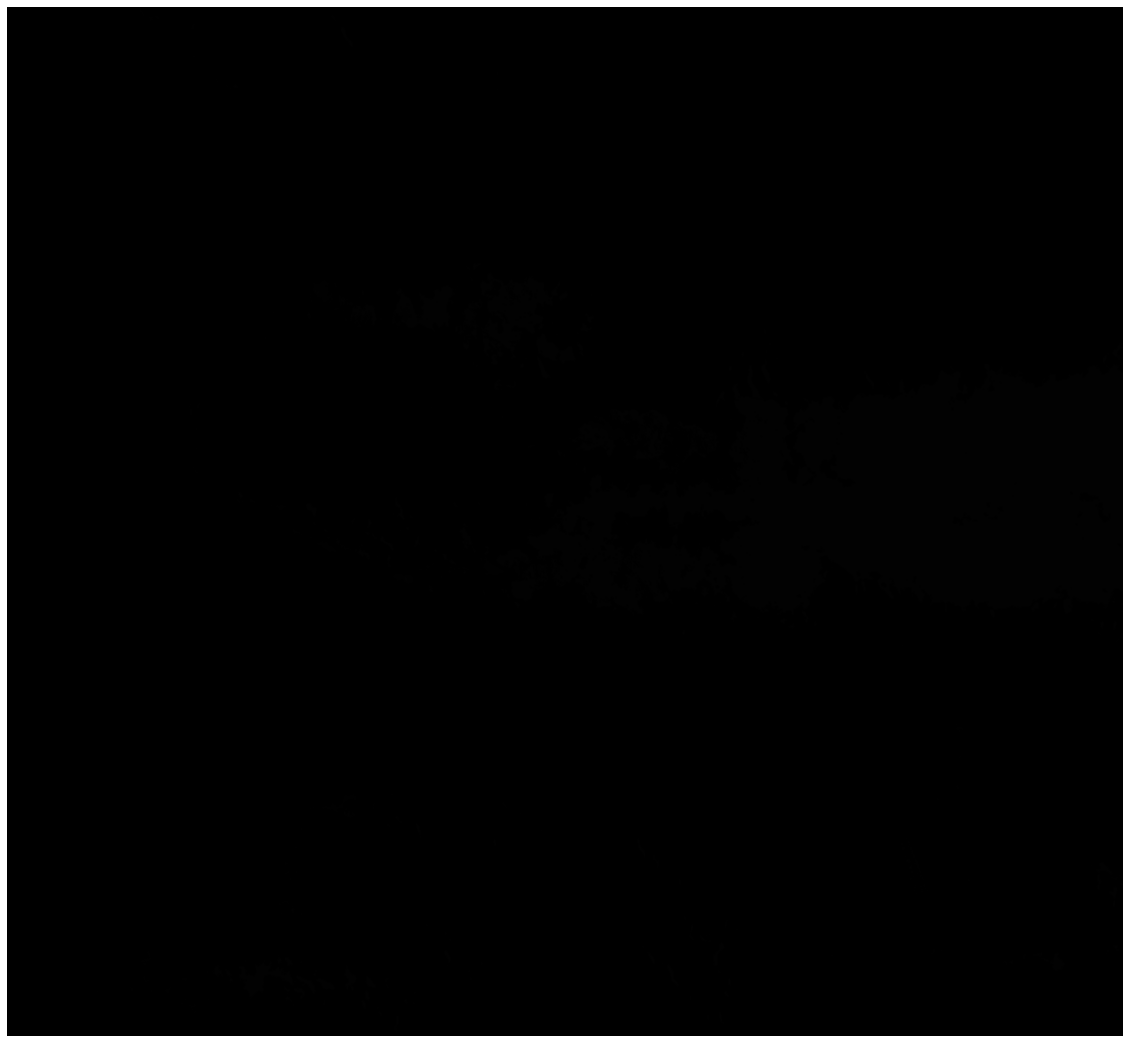

In [146]:
## Firstly fire, no fire. 

img = cv2.imread("data_label2/L_FS1_Gospers12019-12-06.png")
# img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img[(img[:,:,0]!=255) & (img[:,:,2]!=255) ] = 0
# img[(img[:,:,2]!=255) ] = 0
img[img[:,:,0]==255] = 1 ## Set this to 255 if want to see clearly in image ## Indicates that is fire (Class = 1 -> Fire)
img[img[:,:,2]==255] = 2 ## 2 = cloud 

##Set thes to 125 and 255 if u want to see it visualised in the plot

plt.figure(figsize = (20,20))
plt.imshow(img)
plt.axis("off")
plt.show()

In [147]:
## Fire, cloud, background for dataset with more cloud cover 

label2_dir = os.listdir('data_label2')

for img_name in label2_dir:
    print(img_name)
    img = cv2.imread('data_label2/' + img_name)
    img[(img[:,:,0]!=255) & (img[:,:,2]!=255) ] = 0
    img[img[:,:,0]==255] = 1 ## Set this to 255 if want to see clearly in image ## Indicates that is fire (Class = 1 -> Fire)
    img[img[:,:,2]==255] = 2 ## 2 = cloud 

    cv2.imwrite("data_label2_masks_fc/M" + img_name, img) 

L_NFS32020-01-05.png
L_NFS22020-01-23.png
L_NFS72020-03-01.png
L_NFS12019-12-13.png
L_NFS62019-12-17.png
L_NFS42020-01-01.png
L_NFS52019-12-12.png
L_FS3_Currowan2019-12-26.png
L_NFS52019-12-07.png
L_NFS42019-12-21.png
L_NFS52020-01-26.png
L_NFS72020-01-11.png
L_NFS12019-12-06.png
L_NFS12020-01-27.png
L_FS5_EGippsland2019-11-21.png
L_NFS22019-12-17.png
L_NFS32020-01-10.png
L_NFS22020-01-08.png
L_NFS12020-01-25.png
L_FS4_OrroralValley2019-12-04.png
L_FS4_OrroralValley2020-01-25.png
L_NFS62020-01-21.png
L_FS3_Currowan2020-01-10.png
L_FS1_Gospers12020-02-04.png
L_FS6_KangarooIsland2020-02-09.png
L_NFS52020-01-31.png
L_NFS72019-12-27.png
L_FS4_OrroralValley2020-01-30.png
L_FS4_OrroralValley2019-12-11.png
L_NFS12019-12-11.png
L_NFS12020-01-30.png
L_FS2_Gospers22020-02-04.png
L_NFS32019-12-26.png
L_FS5_EGippsland2020-02-17.png
L_NFS22019-12-14.png
L_NFS22019-12-04.png
L_NFS22020-01-31.png
L_FS5_EGippsland2020-02-07.png
L_FS2_Gospers22020-02-14.png
L_FS2_Gospers22019-11-21.png
L_FS4_OrroralVal

In [148]:
## Fire cloud, background  for dataset with less cloud cover

label2_dir = os.listdir('data_nc_label2')

for img_name in label2_dir:
    print(img_name)
    img[(img[:,:,0]!=255) & (img[:,:,2]!=255) ] = 0
    img[img[:,:,0]==255] = 1 ## Set this to 255 if want to see clearly in image ## Indicates that is fire (Class = 1 -> Fire)
    img[img[:,:,2]==255] = 2 ## 2 = cloud 
    cv2.imwrite("data_nc_label2_masks_fc/M" + img_name , img) 

L_NFS32020-01-05.png
L_NFS22020-01-23.png
L_NFS72020-03-01.png
L_NFS12019-12-13.png
L_NFS62019-12-17.png
L_NFS42020-01-01.png
L_FS3_Currowan2019-12-26.png
L_NFS52019-12-07.png
L_NFS42019-12-21.png
L_NFS52020-01-26.png
L_NFS72020-01-11.png
L_NFS12019-12-06.png
L_NFS12020-01-27.png
L_NFS22019-12-17.png
L_NFS32020-01-10.png
L_NFS22020-01-08.png
L_NFS12020-01-25.png
L_FS4_OrroralValley2019-12-04.png
L_FS4_OrroralValley2020-01-25.png
L_NFS62020-01-21.png
L_FS1_Gospers12020-02-04.png
L_FS6_KangarooIsland2020-02-09.png
L_NFS52020-01-31.png
L_FS4_OrroralValley2020-01-30.png
L_FS4_OrroralValley2019-12-11.png
L_NFS12019-12-11.png
L_NFS12020-01-30.png
L_FS2_Gospers22020-02-04.png
L_NFS32019-12-26.png
L_NFS22019-12-14.png
L_NFS22019-12-04.png
L_NFS22020-01-31.png
L_FS4_OrroralValley2020-01-08.png
L_NFS52020-01-21.png
L_FS1_Gospers12019-11-21.png
L_FS6_KangarooIsland2020-02-24.png
L_NFS42019-12-27.png
L_NFS72019-12-22.png
L_NFS12019-12-28.png
L_NFS22020-01-18.png
L_FS5_EGippsland2019-11-19.png
L_NF